In [ ]:
''' PCA principal component analysis esta tecnica sirve para comprimir informacion de las imagenes manteniendo las caracteristicas mas importantes.
los datasets son grupos de datos que comparten ciertas caracteristicas, donde se extrae informacion clave 
 es dificil reinterpretar la informacion en pca
 variance is the sum of squares of differences between  all numbers and means
 es decir la varianza es la distancia  dispercion entre los datos y la media de los datos
 la covarianza  es la relacion de lasvariables entre si
 los eigen valores y eigenvectores son los vectores que definen la direccion de los datos y los valores que definen la magnitud de esos vectores del pca 
los eigen valores para son para definir la importancia de cada componente principal
los eigenvectores son los vectores que definen la direccion de los datos en el espacio
la proyeccion es la representacion de los datos en el nuevo espacio definido por los eigenvectores
steps for PCA
1. standarize the data
2. calculate the covarianz matrix
3. compute the eigenvalues and eigenvectors
4. select principal components 
5. project data onto new basis
exercise:
feature example1 example2 example3 example4
 x          4         8         13     7
 y          11        4         5      14

x media = (4+8+13+7)/4=8.0
y media = (11+4+5+14)/4=8.5
feature example1 example2 example3 example4
 x          -4        0         5      -1
 y           2.5     -4.5      -3.5    5.5
la covarianza = (1/(n-1)*sum((xi-xmedia)(yi-ymean))

V1[0.55:0.83]  V2[-0.83:0.55]
eigv1 =30.38 eigv2=6.62
x = 2 4 6 8 10
y = 0 1 4 5 7 
media x=6 media y=3.4
standarized x = -4 -2 0 2 4
standarized y = -3.4 -2.4 0.6 1.6 3.6
covarianza = [[10 8],[8 7.3]]
eigenvectores = [[0.78  -0.62],[0.62 0.78]]
eigenvalores = [16.1 1.2]
valores nuevos x =standarizedx*eigenvectores
valores nuevos y =standarizedy*eigenvectores
valores nuevos x = [-4 -2 0 2 4]*[[0.78  -0.62],[0.62 0.78]] = [-2.48 -1.24 0 1.24 2.48]
valores nuevos y = [-3.4 -2.4 0.6 1.6 3.6]*[[0.78  -0.62],[0.62 0.78]] = [-2.65 -1.87 0.37 1.61 2.85]
val nuev x = [-2.48 -1.24 0 1.24 2.48]
val nuev y = [-2.65 -1.87 0.37 1.61 2.85]


'''


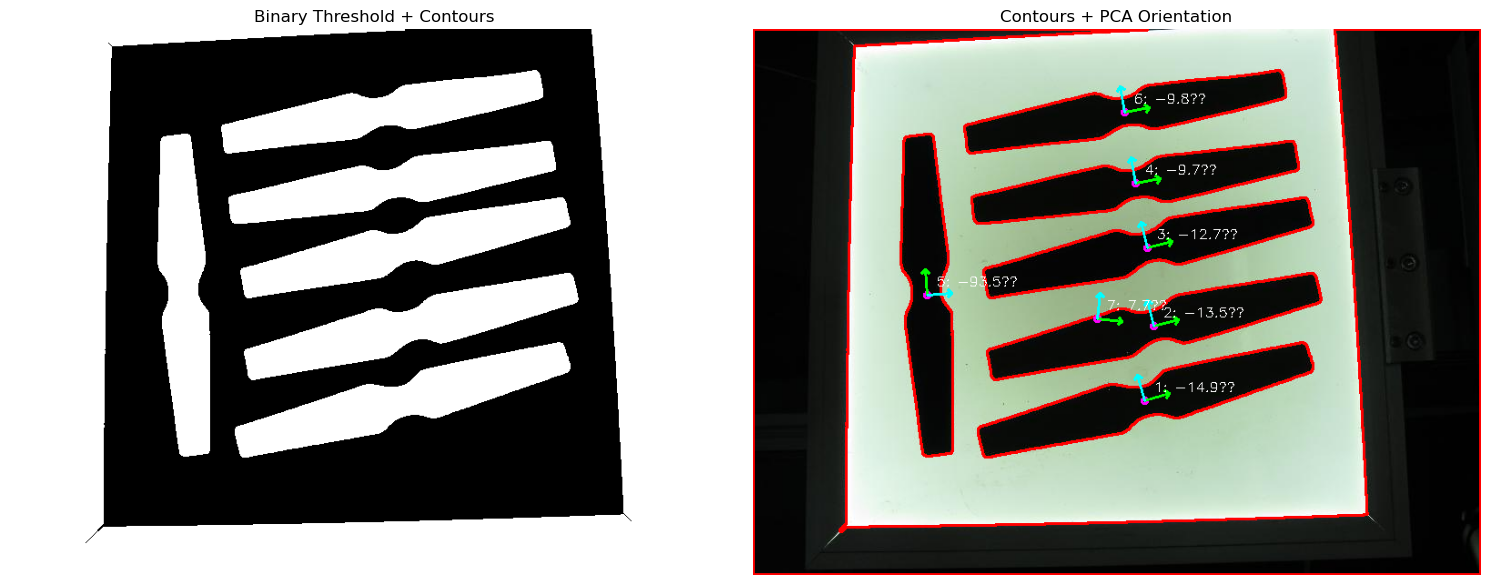

True

In [6]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img = cv2.imread("pca_test1.jpeg")
if img is None:
    raise IOError("Could not read image")

vis = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

scale = 0.02 * (img.shape[0] + img.shape[1])

for i, cnt in enumerate(contours, start=1):
    if cv2.contourArea(cnt) < 1000:
        continue

    cv2.drawContours(vis, [cnt], -1, (0, 0, 255), 2)

    data_pts = np.array(cnt, dtype=np.float64).reshape(-1, 2)
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean=np.empty((0)))
    center = tuple(np.round(mean[0]).astype(int))

    cv2.circle(vis, center, 3, (255, 0, 255), 2)

    p1 = (int(center[0] + eigenvectors[0, 0] * scale),
          int(center[1] + eigenvectors[0, 1] * scale))
    p2 = (int(center[0] - eigenvectors[1, 0] * scale),
          int(center[1] - eigenvectors[1, 1] * scale))

    cv2.arrowedLine(vis, center, p1, (0, 255, 0), 2, tipLength=0.2)   # major axis
    cv2.arrowedLine(vis, center, p2, (255, 255, 0), 2, tipLength=0.2) # minor axis

    angle = math.degrees(math.atan2(eigenvectors[0, 1], eigenvectors[0, 0]))
    cv2.putText(vis, f"{i}: {angle:.1f}°", (center[0] + 10, center[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold + Contours")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Contours + PCA Orientation")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("pca_output.png", vis)

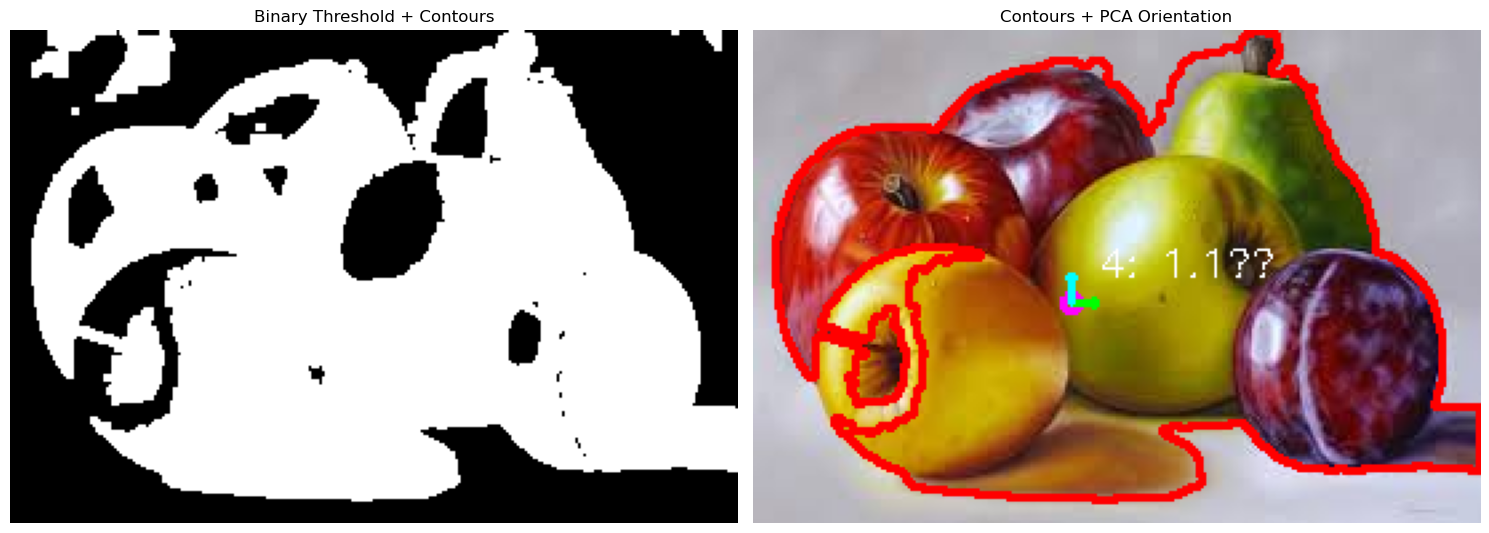

True

In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img = cv2.imread("frutas.jpeg")
if img is None:
    raise IOError("Could not read image")

vis = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

scale = 0.02 * (img.shape[0] + img.shape[1])

for i, cnt in enumerate(contours, start=1):
    if cv2.contourArea(cnt) < 1000:
        continue

    cv2.drawContours(vis, [cnt], -1, (0, 0, 255), 2)

    data_pts = np.array(cnt, dtype=np.float64).reshape(-1, 2)
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean=np.empty((0)))
    center = tuple(np.round(mean[0]).astype(int))

    cv2.circle(vis, center, 3, (255, 0, 255), 2)

    p1 = (int(center[0] + eigenvectors[0, 0] * scale),
          int(center[1] + eigenvectors[0, 1] * scale))
    p2 = (int(center[0] - eigenvectors[1, 0] * scale),
          int(center[1] - eigenvectors[1, 1] * scale))

    cv2.arrowedLine(vis, center, p1, (0, 255, 0), 2, tipLength=0.2)   # major axis
    cv2.arrowedLine(vis, center, p2, (255, 255, 0), 2, tipLength=0.2) # minor axis

    angle = math.degrees(math.atan2(eigenvectors[0, 1], eigenvectors[0, 0]))
    cv2.putText(vis, f"{i}: {angle:.1f}°", (center[0] + 10, center[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold + Contours")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Contours + PCA Orientation")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("pca_output.png", vis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = [2, 4, 6, 8, 10]
Y = [0, 1, 4, 5, 7]
Z = [1, 3, 5, 6, 8]

# Calcular medias
media_X = sum(X) / len(X)
media_Y = sum(Y) / len(Y)
media_Z = sum(Z) / len(Z)
print("Media de X:", media_X)
print("Media de Y:", media_Y)
print("Media de Z:", media_Z)

# Centrar los datos
for i in range(len(X)):
    X[i] = X[i] - media_X
    Y[i] = Y[i] - media_Y
    Z[i] = Z[i] - media_Z
print("X centrada:", X)
print("Y centrada:", Y)
print("Z centrada:", Z)


n = len(X)
sum_xx = sum([X[i] * X[i] for i in range(n)])
sum_yy = sum([Y[i] * Y[i] for i in range(n)])
sum_zz = sum([Z[i] * Z[i] for i in range(n)])
sum_xy = sum([X[i] * Y[i] for i in range(n)])
sum_xz = sum([X[i] * Z[i] for i in range(n)])
sum_yz = sum([Y[i] * Z[i] for i in range(n)])

CovXX = sum_xx / (n - 1)
CovYY = sum_yy / (n - 1)
CovZZ = sum_zz / (n - 1)
CovXY = sum_xy / (n - 1)
CovXZ = sum_xz / (n - 1)
CovYZ = sum_yz / (n - 1)

print("Covarianza XY:", CovXY)
print("Covarianza XZ:", CovXZ)
print("Covarianza YZ:", CovYZ)
print("Varianza X:", CovXX)
print("Varianza Y:", CovYY)
print("Varianza Z:", CovZZ)

# Matriz de covarianza 3x3
Cov = np.array([
    [CovXX, CovXY, CovXZ],
    [CovXY, CovYY, CovYZ],
    [CovXZ, CovYZ, CovZZ]
])
print("\nMatriz de covarianza:\n", Cov)

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(Cov)
print("\nEigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Media de X: 6.0
Media de Y: 3.4
Media de Z: 4.6
X centrada: [-4.0, -2.0, 0.0, 2.0, 4.0]
Y centrada: [-3.4, -2.4, 0.6000000000000001, 1.6, 3.6]
Z centrada: [-3.5999999999999996, -1.5999999999999996, 0.40000000000000036, 1.4000000000000004, 3.4000000000000004]
Covarianza XY: 9.0
Covarianza XZ: 8.5
Covarianza YZ: 7.7
Varianza X: 10.0
Varianza Y: 8.3
Varianza Z: 7.3

Matriz de covarianza:
 [[10.   9.   8.5]
 [ 9.   8.3  7.7]
 [ 8.5  7.7  7.3]]

Eigenvalues:
 [25.44100128  0.04199177  0.11700696]
Eigenvectors:
 [[-0.62551374 -0.58259354  0.51895792]
 [-0.56848162 -0.11524624 -0.81458392]
 [-0.53437928  0.80455147  0.25910561]]


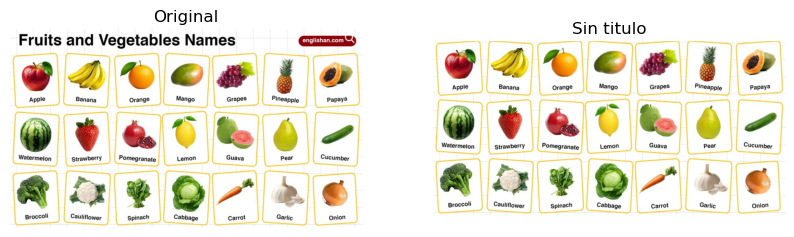

In [3]:
"""exercise 
remove the image title using image cropping
making use of morphological features, linear transformations or filters,get rid of letters
Use PCA to identify how many reddishelemnts are in the image"""


import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = "fruts.jpeg"   
img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w = img.shape[:2]
crop_ratio = 0.12 
crop_top = int(h * crop_ratio)

cropped_img = img_rgb[crop_top:, :]

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cropped_img)
plt.title("Sin titulo")
plt.axis("off")

plt.show()


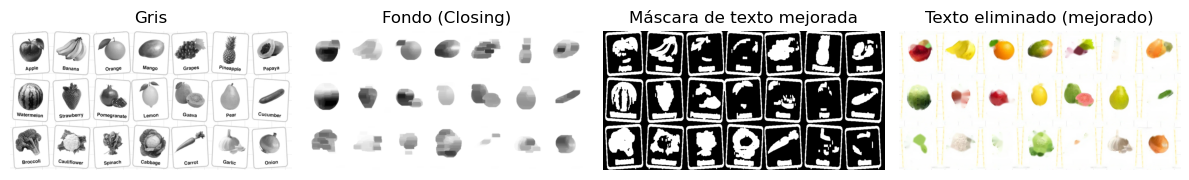

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir a gris
gray = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)

kernel_bg = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 11))
bg = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel_bg)

text_enhanced = cv2.subtract(bg, gray)

_, th = cv2.threshold(text_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, np.ones((5,3), np.uint8), iterations=2)
th = cv2.dilate(th, np.ones((5,2), np.uint8), iterations=2)

img_inpainted = cv2.inpaint(cropped_img, th, inpaintRadius=6, flags=cv2.INPAINT_TELEA)

plt.figure(figsize=(12,6))
plt.subplot(1,4,1); plt.imshow(gray, cmap='gray'); plt.title('Gris'); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(bg, cmap='gray'); plt.title('Fondo (Closing)'); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(th, cmap='gray'); plt.title('Máscara de texto'); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(img_inpainted); plt.title('Texto eliminado '); plt.axis('off')
plt.tight_layout(); plt.show()
